In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
'''
in this class we will be implementing the Upper bound action selection algorithm for a multi arm bandit anc comparing it to using an epsilon greedy strategy
it will use both the epsilon greedy strategy and UCB strategy so we can later plot the two action selection in a graph
'''

class UCBBandit(object):
    def __init__(self, trueActionValues, totalSteps,c_Constant):
        self.num_arms = np.size(trueActionValues)
        self.c_constant = c_Constant
        self.current_step = 0   # this will also be used to hold the total number of arm selections
        self.ucb_q_values = np.zeros(self.num_arms)   # estimated mean rewards of each arm
        self.arm_counts = np.zeros(self.num_arms)   # the number for times each arm has been selected
        self.ucbmeanReward = np.zeros(totalSteps+1)
        self.currentReward = 0
        self.trueActionValues = trueActionValues
        self.total_steps = totalSteps
    
    def selectArmUCB(self):  # this method will select the arm to play using the UCB method
        exploration_term = self.c_constant*(np.sqrt(np.log(self.current_step+ 1)/(self.arm_counts + 1e-6)))
        ucb_values = self.ucb_q_values + exploration_term
        # i add the 1e-6 to not cause an error when the self.arm_counts is starting
        selected_arm = np.argmax(ucb_values)
        self.arm_counts[selected_arm] += 1  # update the arm counts
        self.current_step += 1 # update the current step
        self.currentReward = np.random.normal(self.trueActionValues[selected_arm], 2) # get the reward of the selected action from the true action values
        # update the means for both the overall mean and the mean for each arm
        self.ucbmeanReward[self.current_step]= self.ucbmeanReward[self.current_step-1]+(1/(self.current_step))*(self.currentReward-self.ucbmeanReward[self.current_step-1])
        self.ucb_q_values[selected_arm] = self.ucb_q_values[selected_arm]+ (1/(self.arm_counts[selected_arm]))*(self.currentReward-self.ucb_q_values[selected_arm])
 
    
    def playGameUCB(self):
        for i in range(self.total_steps):
            self.selectArmUCB()
                    

In [46]:
class EpsilonBandit(object):
    def __init__(self, trueActionValues, totalSteps, epsilon):
        self.armNumber = np.size(trueActionValues)
        self.epsilon = epsilon
        self.currentStep = 0
        self.howManyTimesAnArmSelected = np.zeros(self.armNumber)
        self.totalSteps = totalSteps
        self.armMeanRewards = np.zeros(self.armNumber)
        self.trueActionValues = trueActionValues
        self.currentReward = 0
        self.meanReward = np.zeros(totalSteps+1)
    
    # method to selct action based on the epsilon greedy strategy
    def selectAction(self):
        # what will happen here is a number between 0 and 1 will be generated at random.
        # if it is greater than epsilon we take greedy actions else we select an arm by random
        probDraw = np.random.rand()
        if(self.currentStep == 0) or (probDraw <= self.epsilon):
            selectedArmIndex = np.random.choice(self.armNumber)
        elif(probDraw > self.epsilon):
            selectedArmIndex = np.argmax(self.armMeanRewards)
        
        # increase the step
        self.currentStep = self.currentStep+1
        
        # record how many times the particular arm is selected
        self.howManyTimesAnArmSelected[selectedArmIndex] = self.howManyTimesAnArmSelected[selectedArmIndex] +1
        
        # get the reward of the selected action from the true action values
        self.currentReward = np.random.normal(self.trueActionValues[selectedArmIndex], 2)
        
        # update the total estimated mean reward at this step
        self.meanReward[self.currentStep]= self.meanReward[self.currentStep-1]+(1/(self.currentStep))*(self.currentReward-self.meanReward[self.currentStep-1])
        
        # update the mean estimate for this selected arm
        self.armMeanRewards[selectedArmIndex] = self.armMeanRewards[selectedArmIndex]+ (1/(self.howManyTimesAnArmSelected[selectedArmIndex]))*(self.currentReward-self.armMeanRewards[selectedArmIndex])
        
    
    # method to run the silumation
    def playGame(self):
        for i in range(self.totalSteps):
            self.selectAction()

In [60]:
true_action_values = np.array([1, 4, -1, 5, 9])
totalSimSteps = 1_000_000

#UCB bandit
c_constant = 2

ucb_bandit = UCBBandit(true_action_values, totalSimSteps, c_constant)

ucb_bandit.playGameUCB()

UCB_Mean = ucb_bandit.ucbmeanReward

#epsilon Bandit

epsilon = 0.1

epsilon_bandit = EpsilonBandit(true_action_values, totalSimSteps, epsilon)

epsilon_bandit.playGame()

epsilon_Mean = epsilon_bandit.meanReward

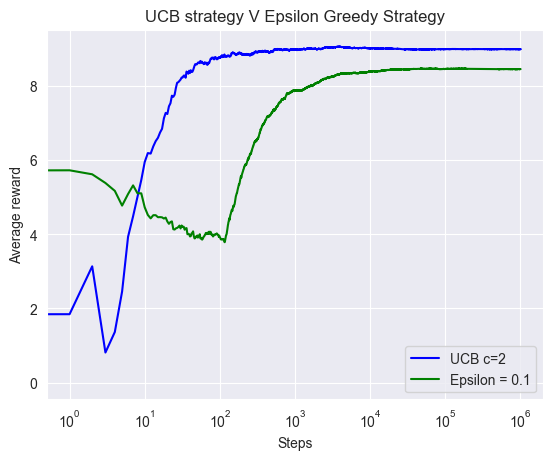

In [61]:
sns.set_style('darkgrid')
# plot the results
plt.plot(np.arange(totalSimSteps+1), UCB_Mean, linewidth = 1.5, color = 'b', label = 'UCB c=2')
plt.plot(np.arange(totalSimSteps+1), epsilon_Mean, linewidth = 1.5, color = 'g', label = 'Epsilon = 0.1')


plt.xscale('log')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('UCB strategy V Epsilon Greedy Strategy')
plt.legend()
plt.show()